### Showcase of new IBF algorithm

Due to protection of solutions created for the algorithm, the following document will only showcase its quality of classifiaction. The presentation shows how algorithm behaves when applied to different datasets. 

Mentioned datasets include:
1. Two synthetic datasets
2. All (three) Whisconsin Breast Cancer (WBC) datasets
3. Iris dataset

In [39]:

include("InteliAIS.jl")
include("data_gens/gen_class_ds.jl")

generate_donut_distribution (generic function with 1 method)

### Test with generated distributions

Dataset is ballanced, sampled from gaussian distributions. 

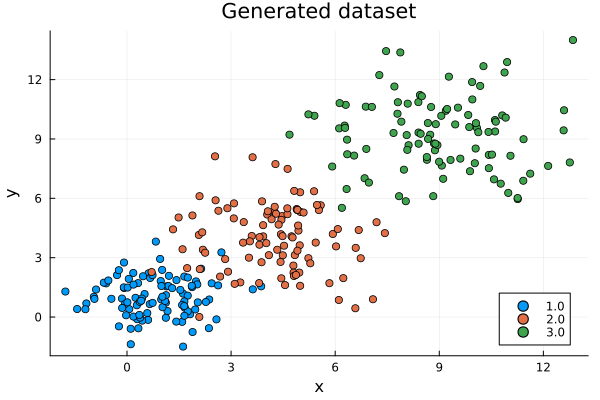

In [70]:
# The training data

data = generate_dataset(3, 300, 3) # 3 classes, 300 samples, 3 features
X_train = data[:, 1:end-1]
y_train = data[:, end]
p1 = scatter(X_train[:, 1], X_train[:, 2], group=y_train, title="Generated dataset", xlabel="x", ylabel="y", legend=:bottomright)

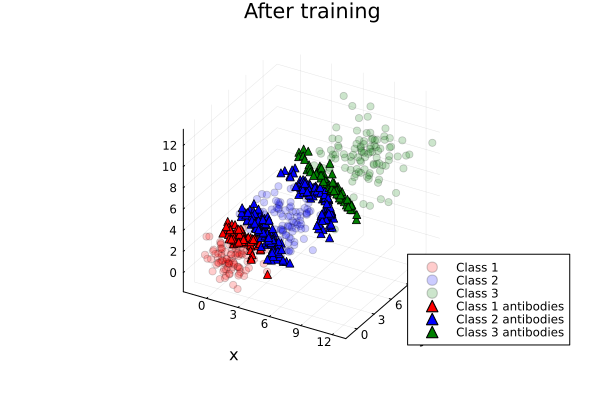

Number of boundry points for class 1: 76
Number of boundry points for class 2: 239
Number of boundry points for class 3: 69


In [71]:
model = inteliais(X_train, y_train, 100, 20, 8)  # 0.5 random_ratio, 300 iterations, 5 neighbors

dict_data = data_to_dict(X_train, y_train)

p1 = scatter(legend=:bottomright, size=(600, 400), title="After training")

scatter!(dict_data[1][:,1], dict_data[1][:,2], dict_data[1][:,3], label="Class 1", color="red", alpha=0.2, makersize=3, xlabel="x", ylabel="y")
scatter!(dict_data[2][:,1], dict_data[2][:,2], dict_data[2][:,3], label="Class 2", color="blue", alpha=0.2, makersize=3)
scatter!(dict_data[3][:,1], dict_data[3][:,2], dict_data[3][:,3], label="Class 3", color="green", alpha=0.2, makersize=3)
#scatter!(cell_tensor[1, :, 1], cell_tensor[2, :, 1], label="Search Cells", color="red", shape=:cross)
if length(model[1]) != 0
    scatter!(model[1][1,:], model[1][2,:], model[1][3,:], label="Class 1 antibodies", color="red", shape=:utriangle)
end
#scatter!(cell_tensor[1, :, 2], cell_tensor[2, :, 2], label="Search Cells", color="blue", shape=:cross)
if length(model[2]) != 0
    scatter!(model[2][1,:], model[2][2,:], model[2][3,:], label="Class 2 antibodies", color="blue", shape=:utriangle)
end
#scatter!(cell_tensor[1, :, 3], cell_tensor[2, :, 3], label="Search Cells", color="green", shape=:cross)
if length(model[3]) != 0
    scatter!(model[3][1,:], model[3][2,:], model[3][3,:], label="Class 3 antibodies", color="green", shape=:utriangle)
end

display(p1)


println("Number of boundry points for class 1: ", size(model[1])[2])
println("Number of boundry points for class 2: ", size(model[2])[2])
println("Number of boundry points for class 3: ", size(model[3])[2])

In [73]:
data = generate_dataset(3, 100, 3) # 3 classes, 100 samples, 3 features

X_test = data[:, 1:end-1]
y_test = data[:, end]

results = classify(model, X_test, y_test, 5)
println("Accuracy: ", results[1])
println("F1 Score for class 1: ", results[2])

Accuracy: 0.98
F1 Score for class 1: 0.9705882352941176


## Test with genrerated donut distributions

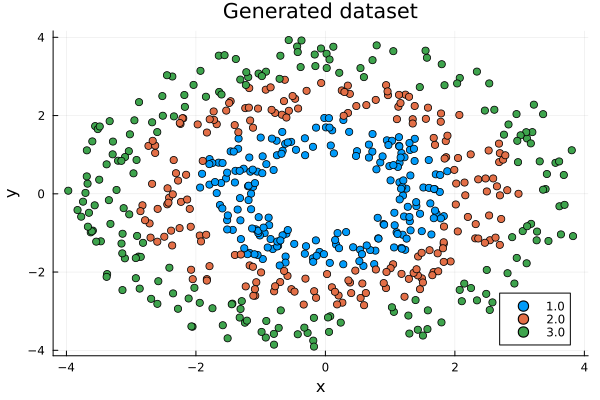

In [78]:
# The training data

data = generate_donut_distribution(3, 600) # 3 classes, 600 samples, 2 features
X_train = data[:, 1:end-1]
y_train = data[:, end]
p1 = scatter(X_train[:, 1], X_train[:, 2], group=y_train, title="Generated dataset", xlabel="x", ylabel="y", legend=:bottomright)

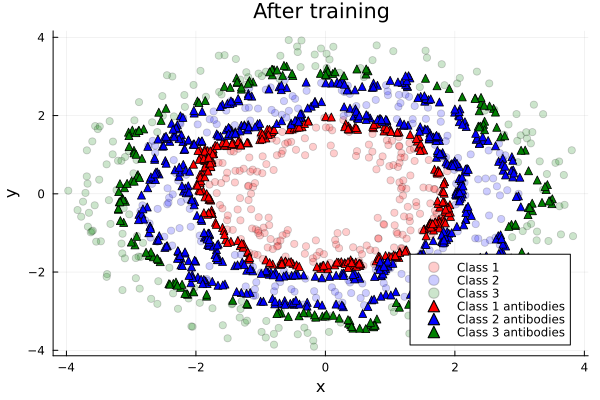

Number of boundry points for class 1: 266
Number of boundry points for class 2: 501
Number of boundry points for class 3: 199


In [79]:
model = inteliais(X_train, y_train, 300, 25, 5)  # 0.5 random_ratio, 300 iterations, 5 neighbors

dict_data = data_to_dict(X_train, y_train)

p1 = scatter(legend=:bottomright, size=(600, 400), title="After training")

scatter!(dict_data[1][:,1], dict_data[1][:,2], label="Class 1", color="red", alpha=0.2, makersize=3, xlabel="x", ylabel="y")
scatter!(dict_data[2][:,1], dict_data[2][:,2], label="Class 2", color="blue", alpha=0.2, makersize=3)
scatter!(dict_data[3][:,1], dict_data[3][:,2], label="Class 3", color="green", alpha=0.2, makersize=3)
#scatter!(cell_tensor[1, :, 1], cell_tensor[2, :, 1], label="Search Cells", color="red", shape=:cross)
if length(model[1]) != 0
    scatter!(model[1][1,:], model[1][2,:], label="Class 1 antibodies", color="red", shape=:utriangle)
end
#scatter!(cell_tensor[1, :, 2], cell_tensor[2, :, 2], label="Search Cells", color="blue", shape=:cross)
if length(model[2]) != 0
    scatter!(model[2][1,:], model[2][2,:], label="Class 2 antibodies", color="blue", shape=:utriangle)
end
#scatter!(cell_tensor[1, :, 3], cell_tensor[2, :, 3], label="Search Cells", color="green", shape=:cross)
if length(model[3]) != 0
    scatter!(model[3][1,:], model[3][2,:], label="Class 3 antibodies", color="green", shape=:utriangle)
end

display(p1)


println("Number of boundry points for class 1: ", size(model[1])[2])
println("Number of boundry points for class 2: ", size(model[2])[2])
println("Number of boundry points for class 3: ", size(model[3])[2])

In [80]:
data = generate_donut_distribution(3, 200) # 3 classes, 300 samples, 2 features

X_test = data[:, 1:end-1]
y_test = data[:, end]

results = classify(model, X_test, y_test, 10)
println("Accuracy: ", results[1])
println("F1 Score for class 1: ", results[2])
println("Precision for class 1: ", results[3])
println("Recall for class 1: ", results[4])

Accuracy: 0.955
F1 Score for class 1: 0.935251798561151
Precision for class 1: 0.8904109589041096
Recall for class 1: 0.9848484848484849


## Test with original WBC dataset

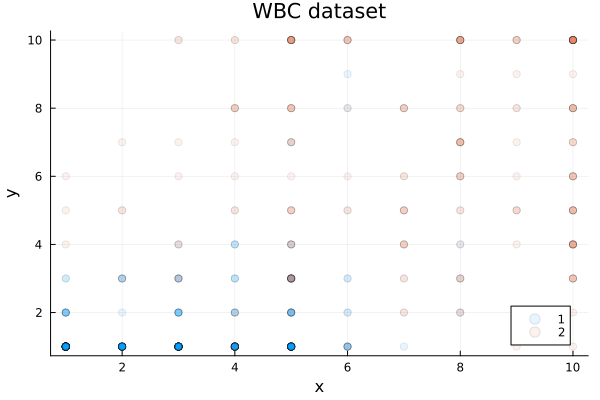

In [88]:
include("benchmarks/wbc/load_data.jl")
dataset, labels = load_wbc_data()
train_data, train_labels, test_data, test_labels = test_train_split(dataset, labels, 0.8)

p1 = scatter(train_data[:, 1], train_data[:, 2], group=train_labels, title="WBC dataset", xlabel="x", ylabel="y", legend=:bottomright, alpha=0.1)



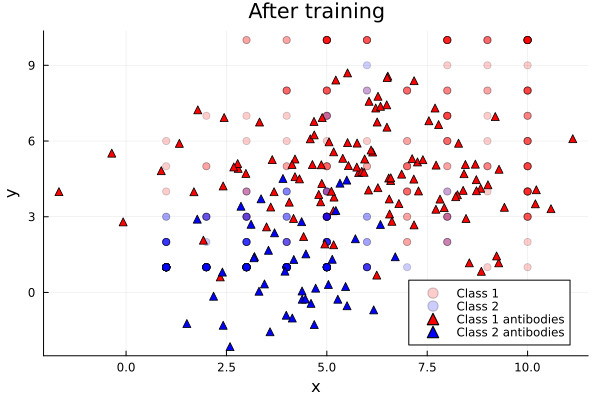

In [89]:

model = inteliais(train_data, train_labels, 15, 50, 10)  # 0.5 random_ratio, 2 iterations, 5 neighbors

dict_data = data_to_dict(train_data, train_labels)

p1 = scatter(legend=:bottomright, size=(600, 400), title="After training")

scatter!(dict_data[2][:,1], dict_data[2][:,2], label="Class 1", color="red", alpha=0.2, makersize=3, xlabel="x", ylabel="y")
scatter!(dict_data[1][:,1], dict_data[1][:,2], label="Class 2", color="blue", alpha=0.2, makersize=3)

if length(model[2]) != 0
    scatter!(model[2][1,:], model[2][2,:], label="Class 1 antibodies", color="red", shape=:utriangle)
end

if length(model[1]) != 0
    scatter!(model[1][1,:], model[1][2,:], label="Class 2 antibodies", color="blue", shape=:utriangle)
end

display(p1)

In [90]:

results = classify(model, test_data, test_labels, 5)
println("Accuracy: ", results[1])
println("F1 Score: ", results[2])
println("Precision: ", results[3])
println("Recall: ", results[4])

Accuracy: 0.9708029197080292
F1 Score: 0.9770114942528736
Precision: 0.9659090909090909
Recall: 0.9883720930232558


## Test with diagnostic WBC dataset

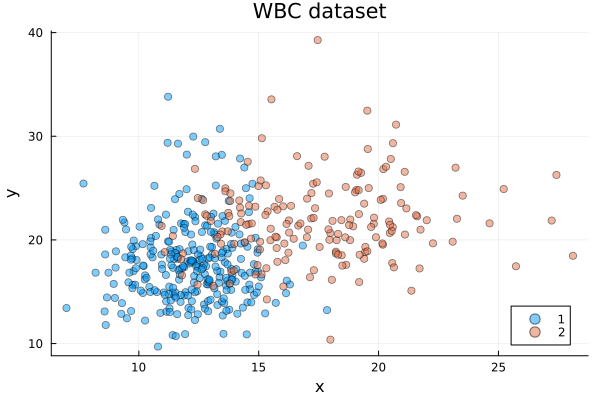

In [108]:

dataset, labels = load_wbc_diagnostics()
train_data, train_labels, test_data, test_labels = test_train_split(dataset, labels, 0.8)

p1 = scatter(train_data[:, 1], train_data[:, 2], group=train_labels, title="WBC dataset", xlabel="x", ylabel="y", legend=:bottomright, alpha=0.5)

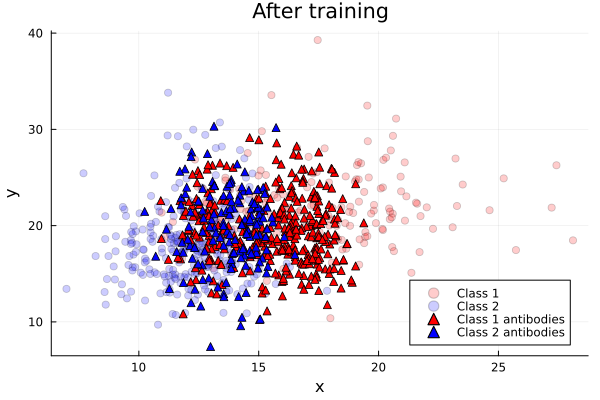

In [109]:
model = inteliais(train_data, train_labels, 150, 20, 10)  # 0.5 random_ratio, 2 iterations, 5 neighbors

dict_data = data_to_dict(train_data, train_labels)

p1 = scatter(legend=:bottomright, size=(600, 400), title="After training")

scatter!(dict_data[2][:,1], dict_data[2][:,2], label="Class 1", color="red", alpha=0.2, makersize=3, xlabel="x", ylabel="y")
scatter!(dict_data[1][:,1], dict_data[1][:,2], label="Class 2", color="blue", alpha=0.2, makersize=3)

if length(model[2]) != 0
    scatter!(model[2][1,:], model[2][2,:], label="Class 1 antibodies", color="red", shape=:utriangle)
end

if length(model[1]) != 0
    scatter!(model[1][1,:], model[1][2,:], label="Class 2 antibodies", color="blue", shape=:utriangle)
end

display(p1)

In [110]:
results = classify(model, test_data, test_labels, 5)
println("Accuracy: ", results[1])
println("F1 Score: ", results[2])
println("Precision: ", results[3])
println("Recall: ", results[4])

Accuracy: 0.9649122807017544
F1 Score: 0.9736842105263158
Precision: 0.9736842105263158
Recall: 0.9736842105263158


## Test with prognostic WBC dataset

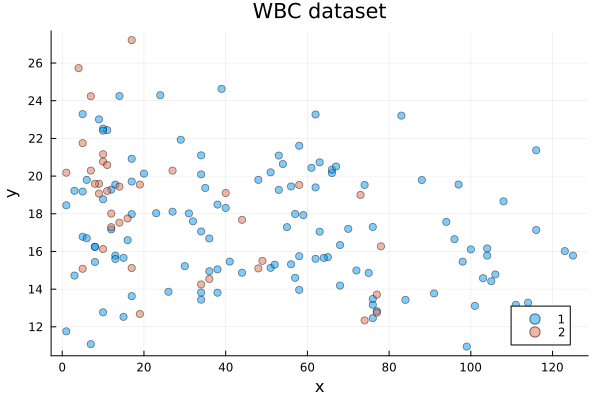

In [111]:
data, labels = load_wbc_prognostics()
train_data, train_labels, test_data, test_labels = test_train_split(data, labels, 0.8)

p1 = scatter(train_data[:, 1], train_data[:, 2], group=train_labels, title="WBC dataset", xlabel="x", ylabel="y", legend=:bottomright, alpha=0.5)

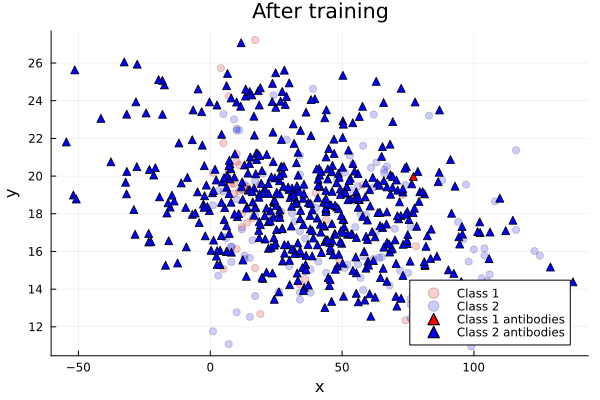

In [117]:

model = inteliais(train_data, train_labels, 100, 20,  6)  # 0.5 random_ratio, 2 iterations, 5 neighbors

dict_data = data_to_dict(train_data, train_labels)

p1 = scatter(legend=:bottomright, size=(600, 400), title="After training")

scatter!(dict_data[2][:,1], dict_data[2][:,2], label="Class 1", color="red", alpha=0.2, makersize=3, xlabel="x", ylabel="y")
scatter!(dict_data[1][:,1], dict_data[1][:,2], label="Class 2", color="blue", alpha=0.2, makersize=3)

if length(model[2]) != 0
    scatter!(model[2][1,:], model[2][2,:], label="Class 1 antibodies", color="red", shape=:utriangle)
end

if length(model[1]) != 0
    scatter!(model[1][1,:], model[1][2,:], label="Class 2 antibodies", color="blue", shape=:utriangle)
end

display(p1)

In [120]:

results = classify(model, test_data, test_labels, 3)
println("Accuracy: ", results[1])
println("F1 Score: ", results[2])
println("Precision: ", results[3])
println("Recall: ", results[4])

Accuracy: 0.7435897435897436
F1 Score: 0.8529411764705882
Precision: 0.7435897435897436
Recall: 1.0


## Iris

Test performed with 60% of data used as the training set.


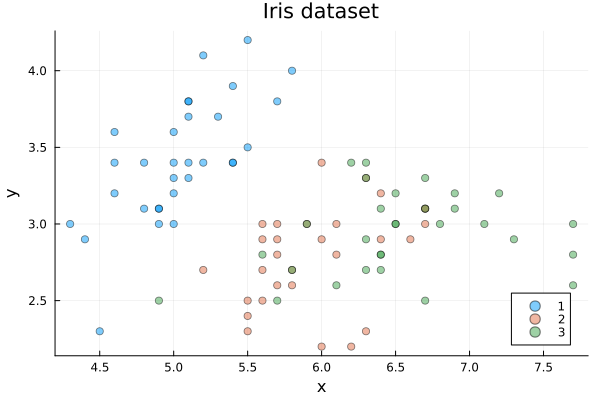

In [122]:
include("benchmarks/iris/load_iris.jl")

data, labels = load_iris_data()

train_data, train_labels, test_data, test_labels = test_train_split(data, labels, 0.6)
model = inteliais(train_data, train_labels, 100, 25,  7)  # 0.5 random_ratio, 2 iterations, 5 neighbors
p1 = scatter(train_data[:, 1], train_data[:, 2], group=train_labels, title="Iris dataset", xlabel="x", ylabel="y", legend=:bottomright, alpha=0.5)



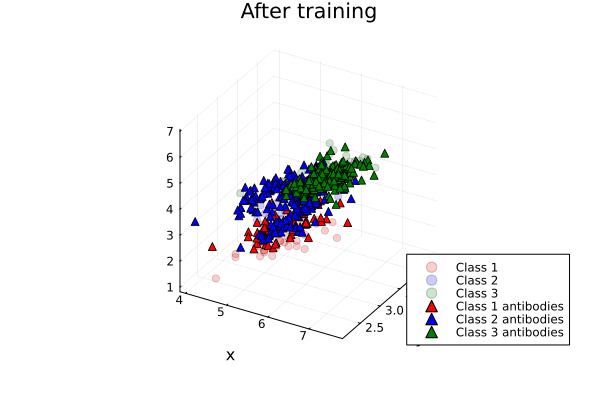

In [123]:

dict_data = data_to_dict(train_data, train_labels)


p1 = scatter(legend=:bottomright, size=(600, 400), title="After training")

scatter!(dict_data[1][:,1], dict_data[1][:,2], dict_data[1][:,3], label="Class 1", color="red", alpha=0.2, makersize=3, xlabel="x", ylabel="y")

scatter!(dict_data[2][:,1], dict_data[2][:,2], dict_data[2][:,3], label="Class 2", color="blue", alpha=0.2, makersize=3)

scatter!(dict_data[3][:,1], dict_data[3][:,2], dict_data[3][:,3],label="Class 3", color="green", alpha=0.2, makersize=3)

if length(model[1]) != 0
    scatter!(model[1][1,:], model[1][2,:], model[1][3,:], label="Class 1 antibodies", color="red", shape=:utriangle)
end

if length(model[2]) != 0
    scatter!(model[2][1,:], model[2][2,:], model[2][3,:],label="Class 2 antibodies", color="blue", shape=:utriangle)
end

if length(model[3]) != 0
    scatter!(model[3][1,:], model[3][2,:], model[3][3,:],label="Class 3 antibodies", color="green", shape=:utriangle)
end

display(p1)

In [125]:

results = classify(model, test_data, test_labels, 5)

println("Accuracy: ", results[1])
println("F1 Score: ", results[2])
println("Precision: ", results[3])
println("Recall: ", results[4])


Accuracy: 0.95
F1 Score: 0.9268292682926829
Precision: 0.8636363636363636
Recall: 1.0
